# Website Analysis - User Engagement

## Importing necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data and extracting into a panda data frame

In [2]:
df = pd.read_csv("website-engagement-data.csv")

## Data Cleaning

In [3]:
df.head() # Give top 5 elements

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df.tail() # Give bottom elements

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2
3182,Unassigned,2024050307,0,1,0,0,0,2,0,2


In [5]:
# Use the first row as column headers.
# This is a common step when your CSV's first row contains the actual column names, not data.
df.columns = df.iloc[0]

# Display the first few rows to confirm the column headers are set correctly.
df.head()

# Remove the now-redundant first row since its values have been promoted to column names.
# We also reset the DataFrame's index to ensure it starts cleanly from 0 after the drop.
df = df.drop(index = 0).reset_index(drop = True)

# After this, 'df.head()' should now show your actual data starting from the new first row!

In [6]:
df.columns = ['channel group',
       'DateHour', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count']
# for re-naming the columns as per ourselves

In [7]:
df.head() # recheck - we will do this step many times

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [8]:
df.info() # to get the data frame schema  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


## Converting the datatype as per the requirements

In [9]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors = "coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [11]:
numerical_cols = df.columns.drop(['channel group', 'DateHour'])
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors = "coerce")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
dtypes: datetime6

In [13]:
df["Hour"] = df["DateHour"].dt.hour

In [14]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [16]:
df.describe() # this functions gives basic stats of the data

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


## Sessions and Users over time

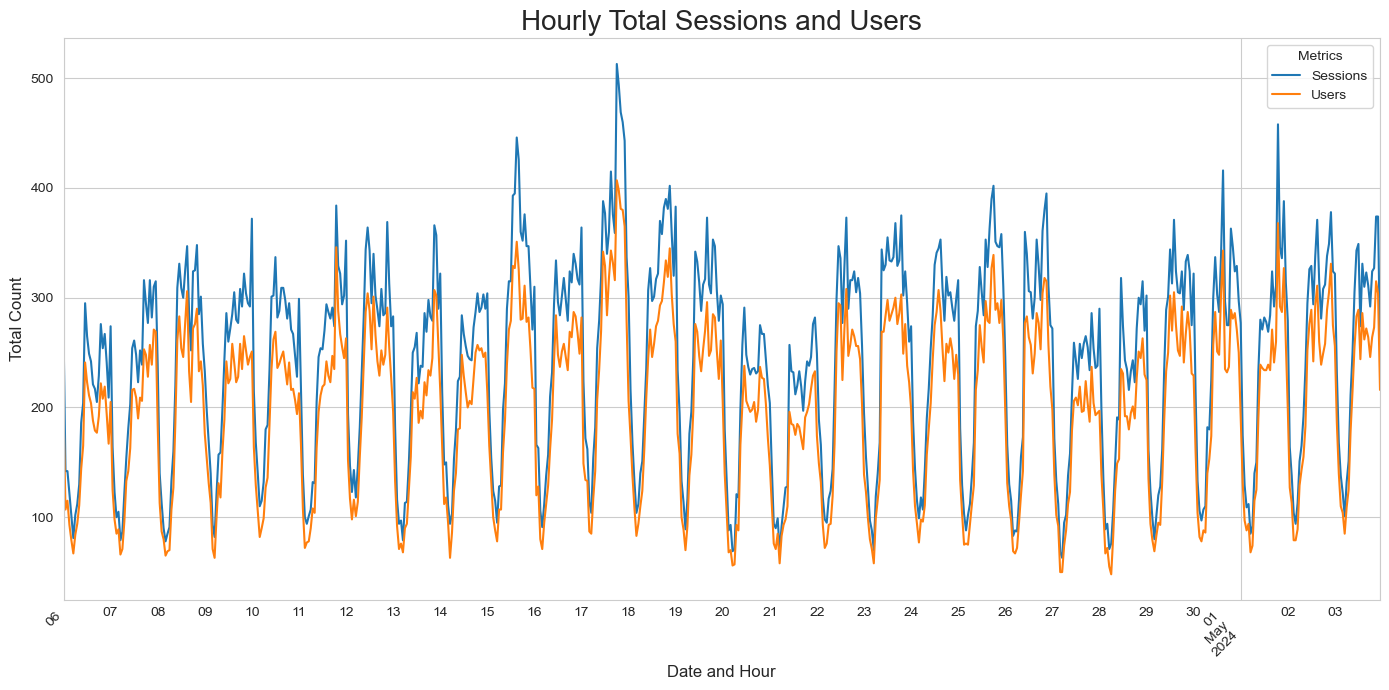

In [17]:
# Set a nice style for the plots using seaborn (optional, but makes it look better)
sns.set_style("whitegrid")

# Create a figure and an axes object to plot on.
# This gives you control over the plot size and properties.
plt.figure(figsize=(14, 7)) # Adjust size as you like

# Group by 'DateHour', select 'Sessions' and 'Users', sum them up, and then plot directly.
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
# -------------------------------

# Add titles and labels for clarity
plt.title('Hourly Total Sessions and Users', fontsize=20)
plt.xlabel('Date and Hour', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.legend(title='Metrics', fontsize=10) # Add a legend to identify the lines

# Improve readability of x-axis labels if they are dense
plt.xticks(rotation=45, ha='right')

# Ensure everything fits nicely
plt.tight_layout()

# To display the plot when you run the script (uncomment this line)
plt.show()

# To save the plot to a file (uncomment this line and change the filename if you want)
# plt.savefig('hourly_sessions_users_plot.png')

## Total Users by Channel

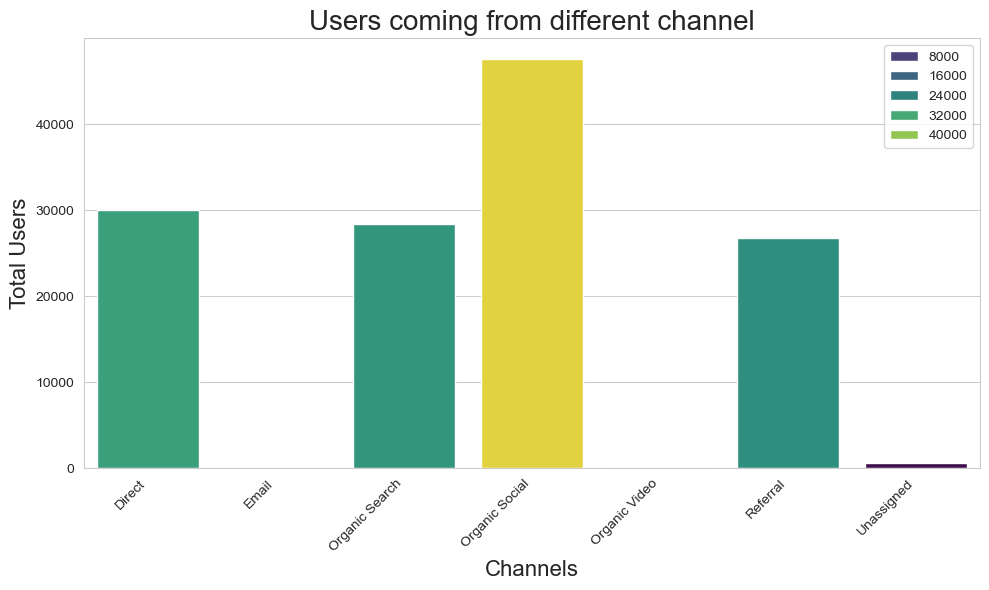

In [18]:
plt.figure(figsize=(10, 6))
total_users_by_channel = df.groupby('channel group')['Users'].sum()
# sns.barplot(x="channel group",y="Users",estimator=np.sum, data=df) # better way
sns.barplot(x=total_users_by_channel.index,y=total_users_by_channel.values,hue=total_users_by_channel.values, palette="viridis")
plt.title("Users coming from different channel",fontsize=20)
plt.xlabel("Channels",fontsize=16)
plt.ylabel("Total Users",fontsize=16)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Average engagement Time of User by Channel

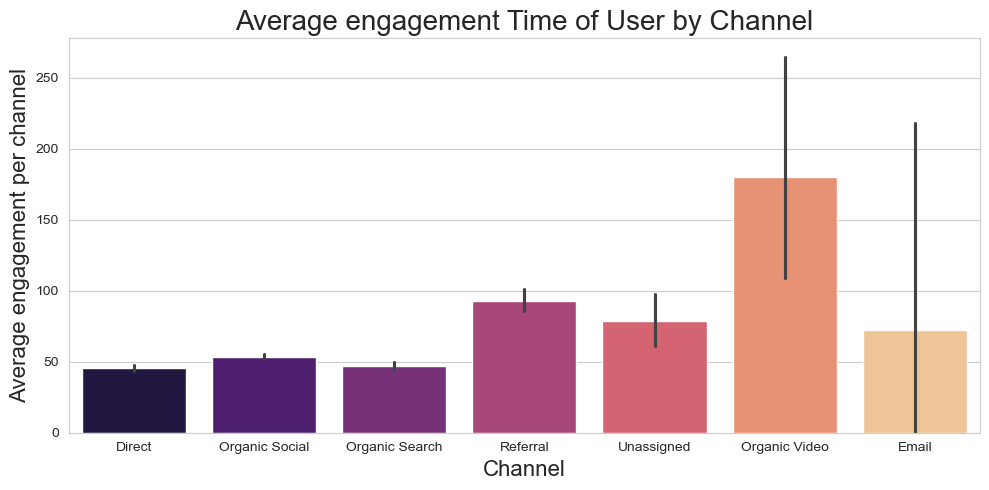

In [19]:
plt.figure(figsize=(10,5))

total_engagement_time_by_channel = df.groupby("channel group")["Average engagement time per session"].sum()
sns.barplot(data=df, x="channel group", y="Average engagement time per session",hue="channel group", estimator=np.mean, palette="magma")

plt.title("Average engagement Time of User by Channel",fontsize=20)
plt.xlabel("Channel",fontsize=16)
plt.ylabel("Average engagement per channel",fontsize=16)
plt.tight_layout()
plt.show()

## Engagement Rate Distribution with traffic channels

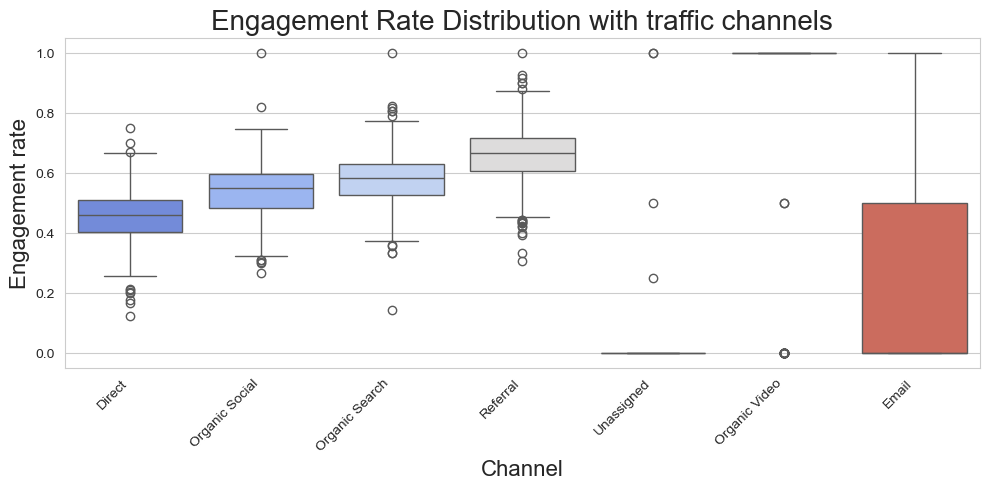

In [20]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df,x="channel group",y="Engagement rate", hue="channel group", palette="coolwarm")
plt.title("Engagement Rate Distribution with traffic channels", fontsize=20)
plt.xlabel("Channel",fontsize=16)
plt.ylabel("Engagement rate",fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Engaged Vs Non-engaged User in Different Channels

In [21]:
session_df = df.groupby("channel group")[["Sessions","Engaged sessions"]].sum().reset_index()
session_df["Non Engaged sessions"] = session_df["Sessions"] - session_df["Engaged sessions"]
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [22]:
session_df.head()

,channel group,Sessions,Engaged sessions,Non Engaged sessions
0,Direct,37203,17243,19960
1,Email,3,1,2
2,Organic Search,33372,19425,13947
3,Organic Social,60627,32697,27930
4,Organic Video,141,109,32


In [23]:
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged sessions","Non Engaged sessions"])

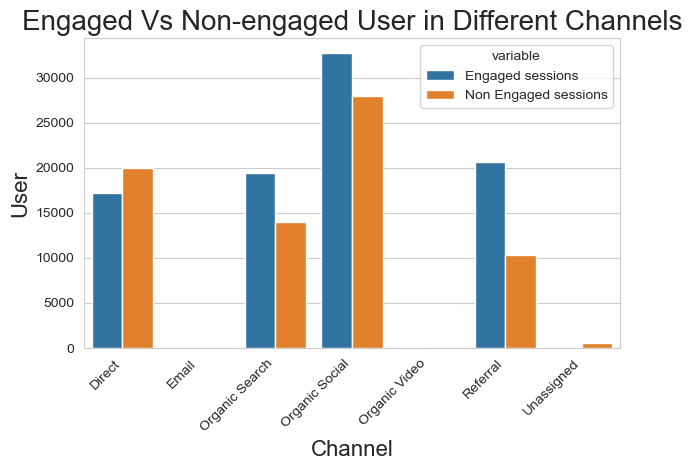

In [24]:
sns.barplot(data=session_df_melted,x="channel group", y="value",hue="variable")

plt.title("Engaged Vs Non-engaged User in Different Channels", fontsize=20)
plt.xlabel("Channel",fontsize=16)
plt.ylabel("User",fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Traffic by hour and channel

In [25]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


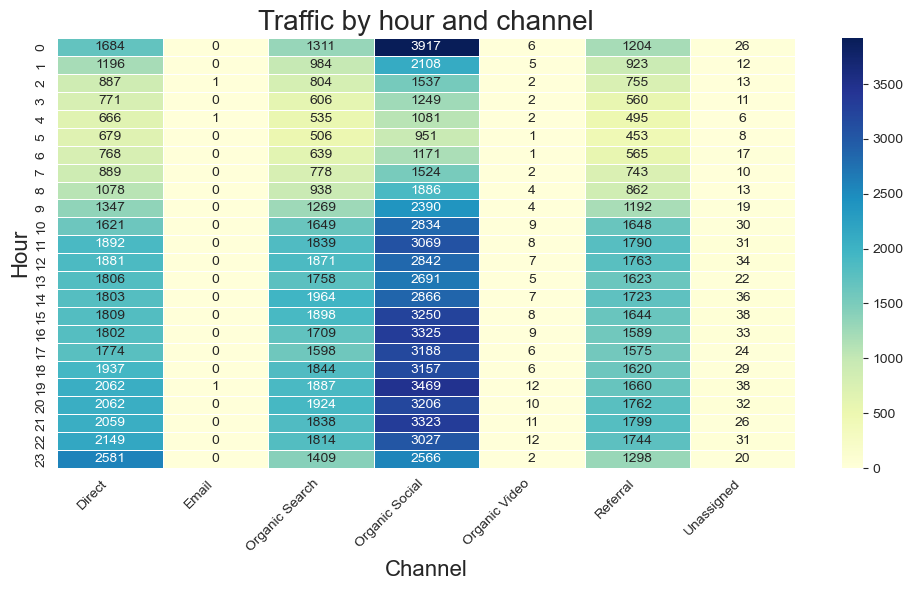

In [29]:
heatmap_data = df.groupby(["Hour","channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(data=heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Traffic by hour and channel", fontsize=20)
plt.xlabel("Channel",fontsize=16)
plt.ylabel("Hour",fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Engagement rate vs session over time

In [32]:
df_plot = df.groupby("DateHour")[["Engagement rate","Sessions"]].mean().reset_index()

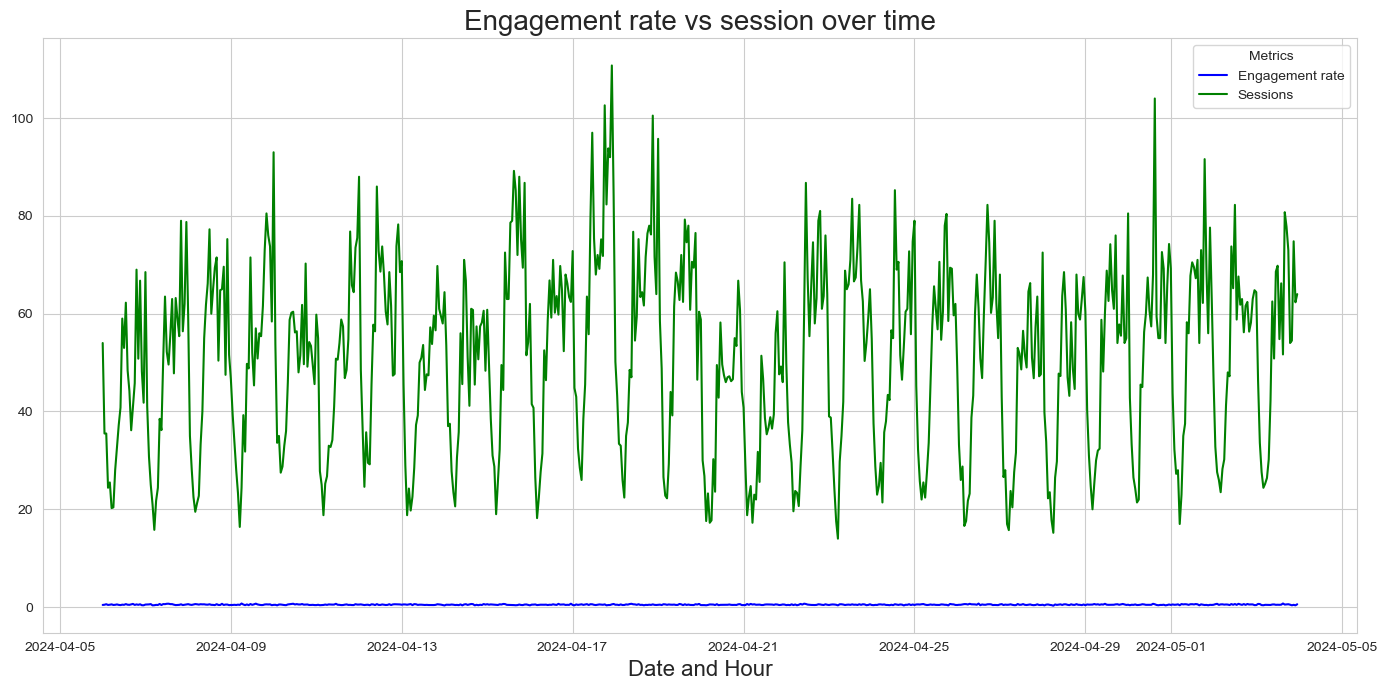

In [39]:
plt.figure(figsize=(14, 7))

plt.plot(df_plot["DateHour"],df_plot["Engagement rate"],label="Engagement rate", color="blue")
plt.plot(df_plot["DateHour"],df_plot["Sessions"],label="Sessions", color="green")

plt.title('Engagement rate vs session over time', fontsize=20)
plt.xlabel('Date and Hour', fontsize=16)
plt.legend(title='Metrics', fontsize=10) # Add a legend to identify the lines

plt.tight_layout()
plt.show()